# Modelos de regresi√≥n lineal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import random
from sklearn.preprocessing import scale
import sklearn.preprocessing
import pyclustertend
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df = train.copy()

2. Haga un an√°lisis exploratorio extenso de los datos. Explique bien todos los hallazgos. No
ponga solo gr√°ficas y c√≥digo. Debe llegar a conclusiones interesantes para poder predecir.
Explique el preprocesamiento que necesit√≥ hacer

In [2]:
print(df.shape)

(1460, 81)


In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe().T


count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [6]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

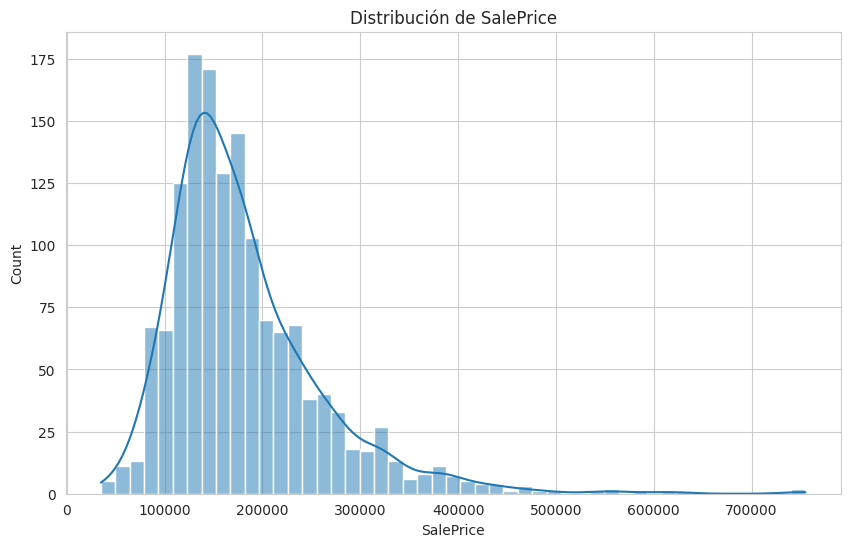

In [7]:
#Distribuci√≥n de SalePrice
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribuci√≥n de SalePrice')
plt.show()

In [8]:
print(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


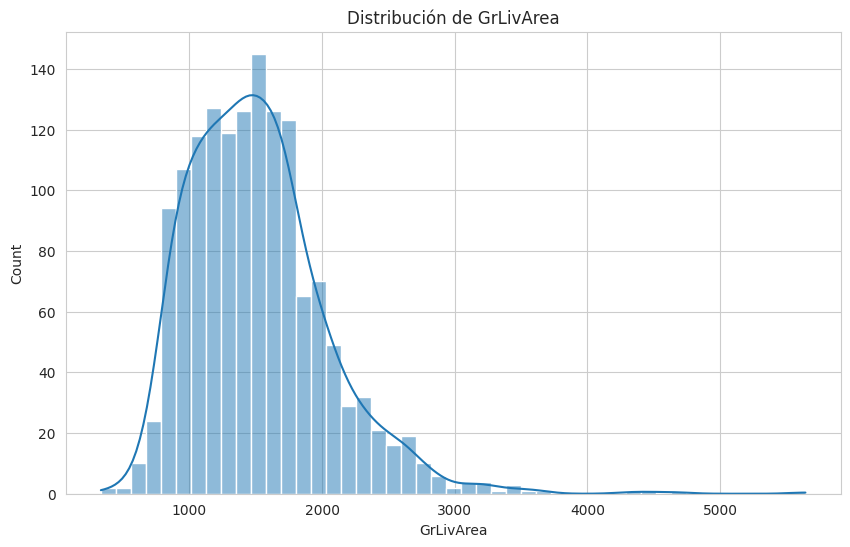

In [9]:
sns.histplot(df['GrLivArea'], kde=True)
plt.title('Distribuci√≥n de GrLivArea')
plt.show()

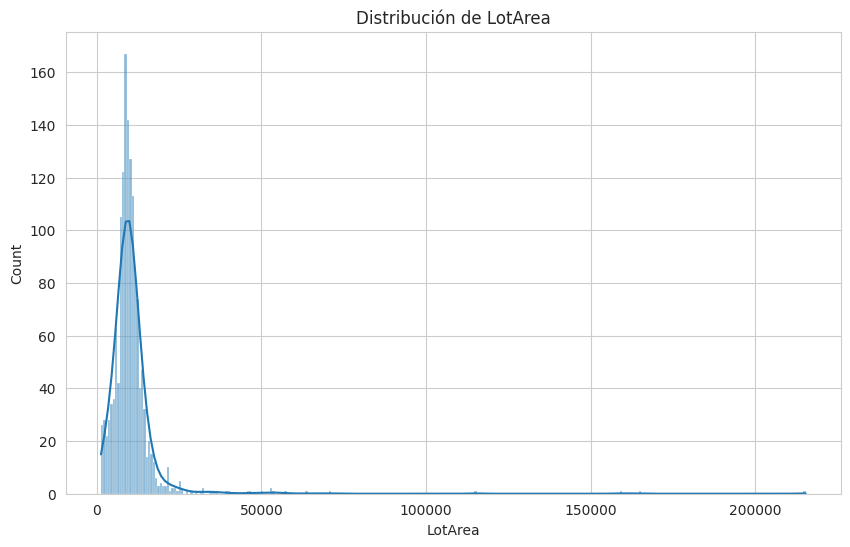

In [10]:
sns.histplot(df['LotArea'], kde=True)
plt.title('Distribuci√≥n de LotArea')
plt.show()

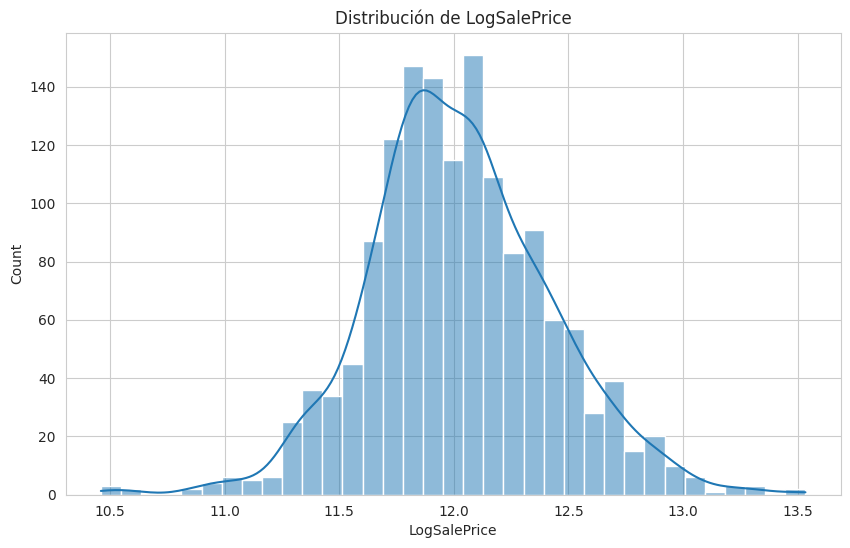

In [11]:
df['LogSalePrice'] = np.log(df['SalePrice'])
sns.histplot(df['LogSalePrice'], kde=True)
plt.title('Distribuci√≥n de LogSalePrice')
plt.show()

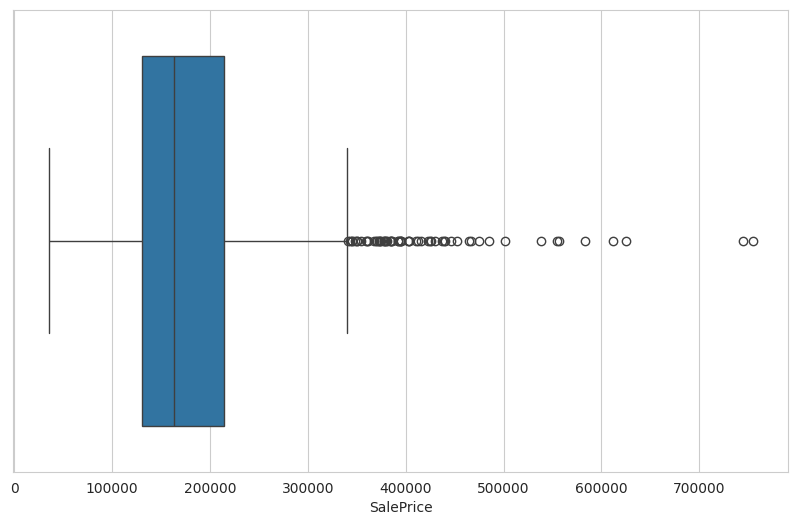

In [12]:
sns.boxplot(x=df['SalePrice'])
plt.show()

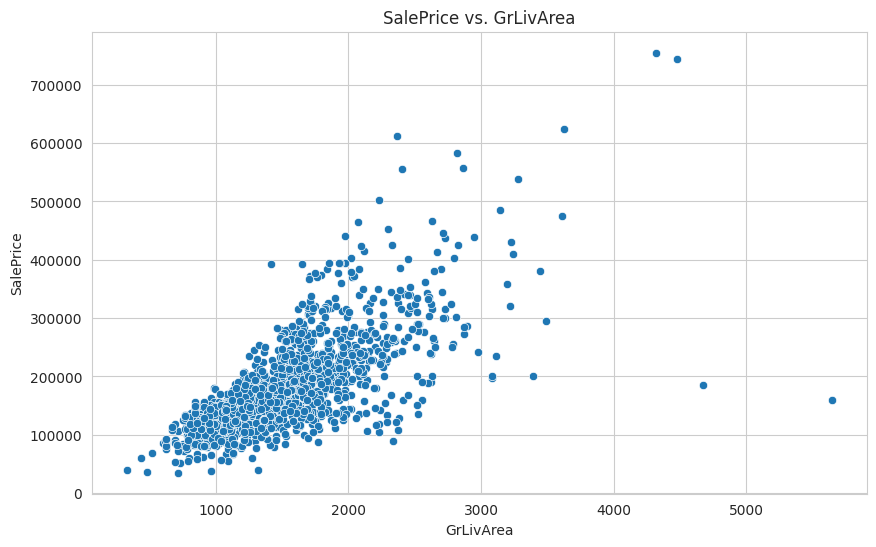

Correlaci√≥n entre SalePrice y GrLivArea: 0.7086244776126521


In [13]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('SalePrice vs. GrLivArea')
plt.show()

correl = df['SalePrice'].corr(df['GrLivArea'])
print(f"Correlaci√≥n entre SalePrice y GrLivArea: {correl}")

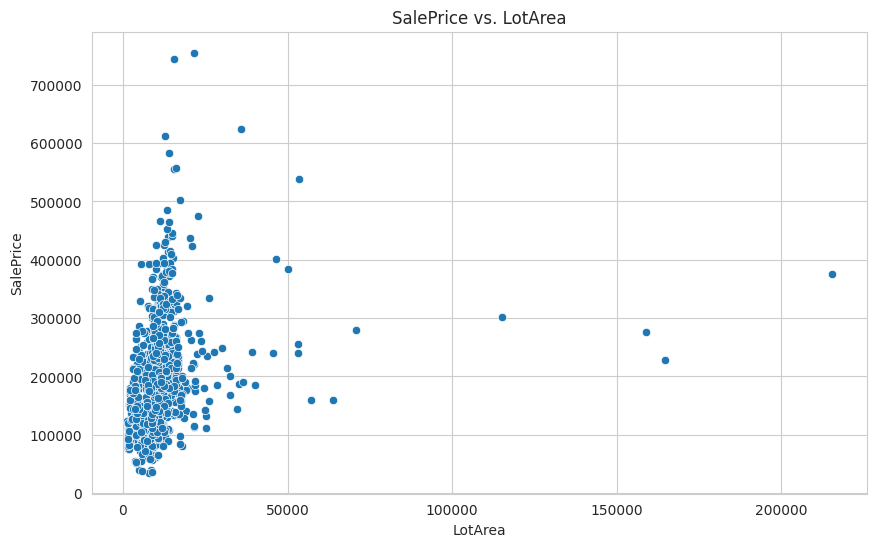

Correlaci√≥n entre SalePrice y LotArea: 0.2638433538714056


In [14]:
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.title('SalePrice vs. LotArea')
plt.show()

correl2 = df['SalePrice'].corr(df['LotArea'])
print(f"Correlaci√≥n entre SalePrice y LotArea: {correl2}")

A partir del an√°lisis de dispersi√≥n y la correlaci√≥n num√©rica entre las variables, se evidencia que GrLivArea (√°rea habitable por encima del nivel del suelo) guarda una relaci√≥n mucho m√°s fuerte con el precio de venta (SalePrice) que LotArea (tama√±o total del lote). La correlaci√≥n entre SalePrice y GrLivArea es aproximadamente 0.71, mientras que con LotArea es cercana a 0.26.

Este resultado es coherente con la din√°mica del mercado inmobiliario, donde el espacio interior habitable aporta generalmente m√°s valor a la vivienda que la extensi√≥n del terreno en s√≠ misma. En otras palabras, los compradores suelen valorar m√°s los metros cuadrados utilizables dentro del hogar que el espacio exterior adicional, pues se traduce en una mayor funcionalidad y comodidad. Asimismo, las casas con lotes extremadamente grandes no siempre muestran precios proporcionalmente m√°s altos, lo que reduce la correlaci√≥n global entre LotArea y SalePrice.


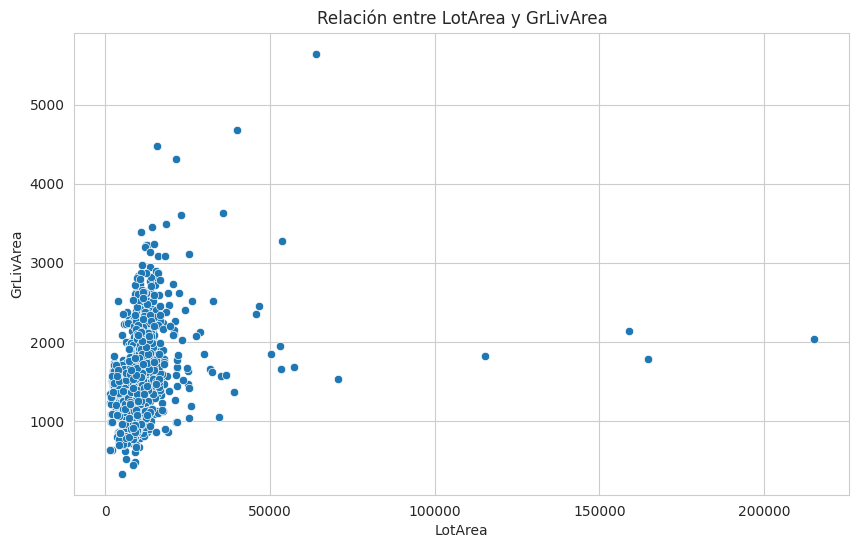

Correlaci√≥n entre LotArea y GrLivArea: 0.26311616716714814


In [15]:
# Gr√°fico de dispersi√≥n
sns.scatterplot(x='LotArea', y='GrLivArea', data=df)
plt.title('Relaci√≥n entre LotArea y GrLivArea')
plt.show()

# C√°lculo de la correlaci√≥n
corr_value = df['LotArea'].corr(df['GrLivArea'])
print("Correlaci√≥n entre LotArea y GrLivArea:", corr_value)

 No hay relaci√≥n entre el tama√±o del lote y el tama√±o de la √°rea habitable por encima del nivel del suelo

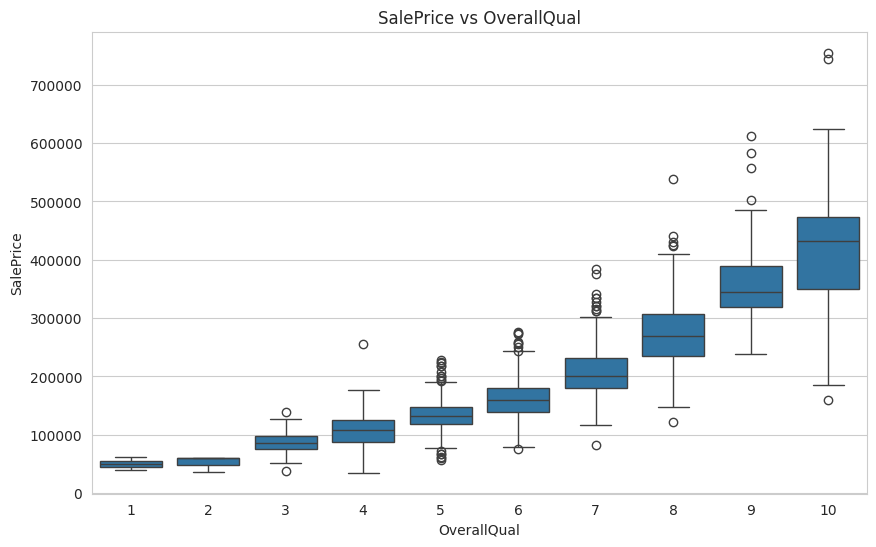

Correlaci√≥n OverallQual - SalePrice: 0.7909816005838051


In [16]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice vs OverallQual')
plt.show()

cor_oq_sp = df['OverallQual'].corr(df['SalePrice'])
print("Correlaci√≥n OverallQual - SalePrice:", cor_oq_sp)



Hay una relaci√≥n entre el precio de venta y la calidad de la vivienda. 

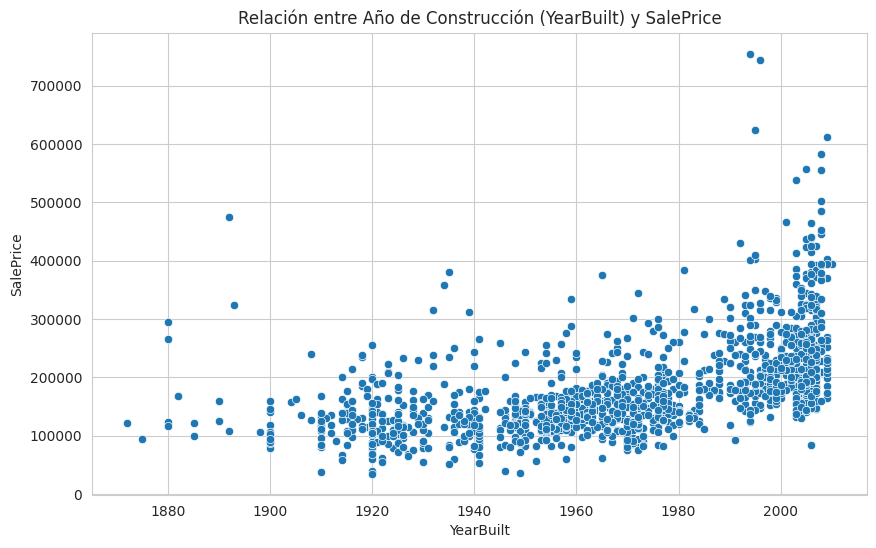

Correlaci√≥n entre YearBuilt y SalePrice: 0.5228973328794971


In [17]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.title('Relaci√≥n entre A√±o de Construcci√≥n (YearBuilt) y SalePrice')
plt.show()

# (Opcional) Calcular correlaci√≥n
corr_yearbuilt = df['YearBuilt'].corr(df['SalePrice'])
print("Correlaci√≥n entre YearBuilt y SalePrice:", corr_yearbuilt)

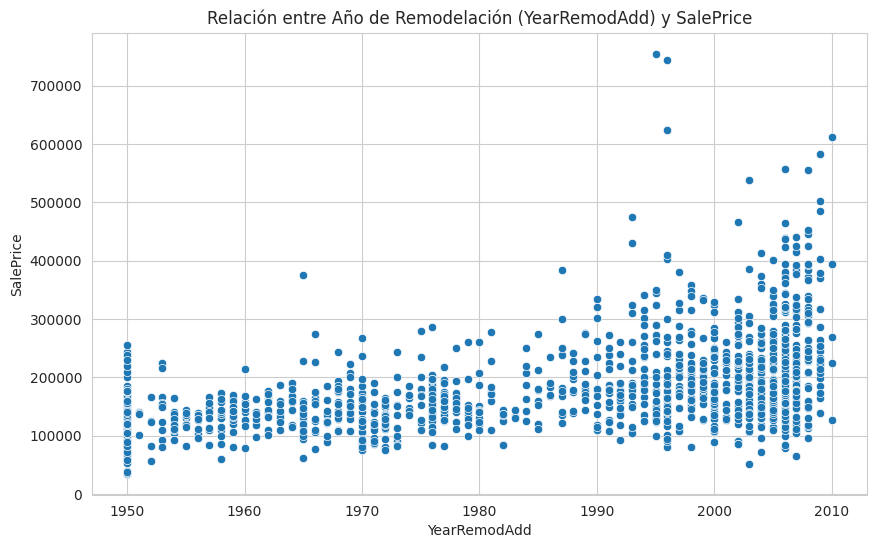

Correlaci√≥n entre YearRemodAdd y SalePrice: 0.5071009671113864


In [18]:
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=df)
plt.title('Relaci√≥n entre A√±o de Remodelaci√≥n (YearRemodAdd) y SalePrice')
plt.show()

corr_yearremod = df['YearRemodAdd'].corr(df['SalePrice'])
print("Correlaci√≥n entre YearRemodAdd y SalePrice:", corr_yearremod)


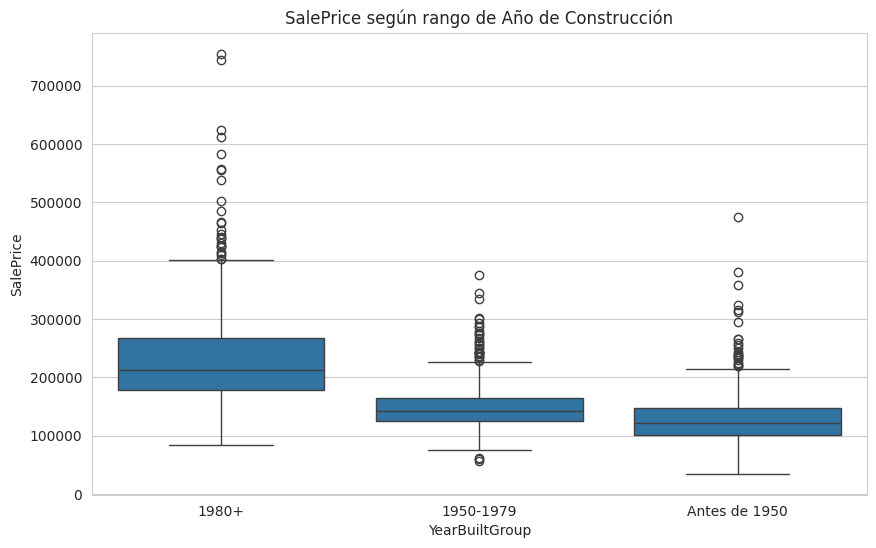

In [19]:
def categorize_year_built(year):
    if year < 1950:
        return 'Antes de 1950'
    elif year < 1980:
        return '1950-1979'
    else:
        return '1980+'

df['YearBuiltGroup'] = df['YearBuilt'].apply(categorize_year_built)

sns.boxplot(x='YearBuiltGroup', y='SalePrice', data=df)
plt.title('SalePrice seg√∫n rango de A√±o de Construcci√≥n')
plt.show()

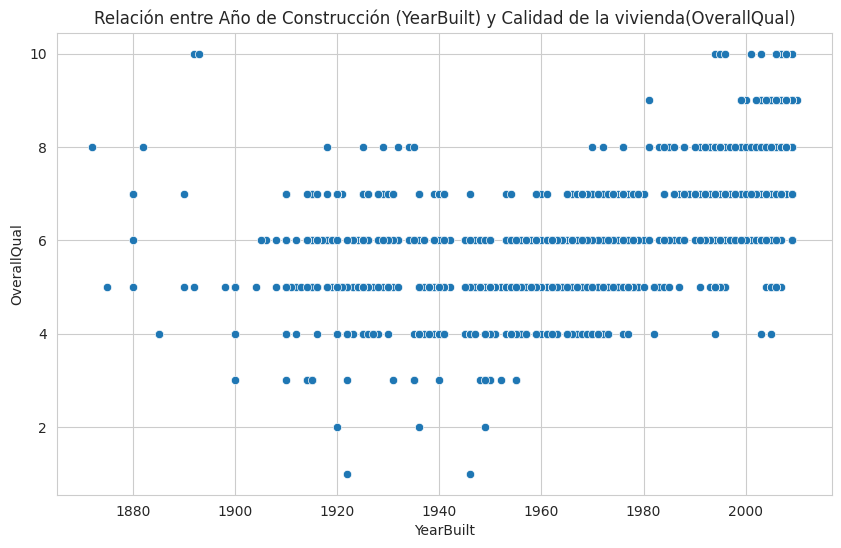

Correlaci√≥n entre YearBuilt y OverallQual: 0.572322768962362


In [20]:
sns.scatterplot(x='YearBuilt', y='OverallQual', data=df)
plt.title('Relaci√≥n entre A√±o de Construcci√≥n (YearBuilt) y Calidad de la vivienda(OverallQual)')
plt.show()

corr_yearbuilt = df['YearBuilt'].corr(df['OverallQual'])
print("Correlaci√≥n entre YearBuilt y OverallQual:", corr_yearbuilt)


Las casas construidas o remodeladas m√°s recientemente tienden a mostrar precios de venta m√°s elevados y, adem√°s, una calidad global (OverallQual) mayor.

La correlaci√≥n entre YearBuilt y SalePrice (~0.52) indica una relaci√≥n moderadamente positiva: las viviendas m√°s nuevas suelen ser m√°s costosas.

La correlaci√≥n de YearRemodAdd (~0.51) confirma que una remodelaci√≥n reciente tambi√©n puede incrementar el valor de la propiedad.

Por su parte, la correlaci√≥n YearBuilt‚ÄìOverallQual (~0.57) sugiere que las construcciones m√°s modernas tienden a tener mejor calidad seg√∫n la escala de calificaci√≥n, lo que contribuye a elevar su precio final.

In [21]:
qual_map = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Average/Typical
    'Fa': 2,  # Fair
    'Po': 1,  # Poor
    np.nan: 0 # En caso de que haya NAs, asignar 0
}

df['KitchenQual_num'] = df['KitchenQual'].map(qual_map)
df['BsmtQual_num'] = df['BsmtQual'].map(qual_map)
df['FireplaceQu_num'] = df['FireplaceQu'].map(qual_map)
df['ExterQual_num'] = df['ExterQual'].map(qual_map)


df[['KitchenQual', 'KitchenQual_num']].head(10)


KitchenQual  KitchenQual_num
0          Gd                4
1          TA                3
2          Gd                4
3          Gd                4
4          Gd                4
5          TA                3
6          Gd                4
7          TA                3
8          TA                3
9          TA                3

In [22]:
calidad_cols = ['KitchenQual_num','BsmtQual_num','FireplaceQu_num','ExterQual_num']

for col in calidad_cols:
    corr_value = df[col].corr(df['SalePrice'])
    print(f"Correlaci√≥n entre {col} y SalePrice: {corr_value:.3f}")


Correlaci√≥n entre KitchenQual_num y SalePrice: 0.660
Correlaci√≥n entre BsmtQual_num y SalePrice: 0.585
Correlaci√≥n entre FireplaceQu_num y SalePrice: 0.520
Correlaci√≥n entre ExterQual_num y SalePrice: 0.683


sns.boxplot(x='KitchenQual', y='SalePrice', data=df)
plt.title('SalePrice vs. KitchenQual')
plt.show()

sns.boxplot(x='BsmtQual', y='SalePrice', data=df)
plt.title('SalePrice vs. BsmtQual')
plt.show()

sns.boxplot(x='FireplaceQu', y='SalePrice', data=df)
plt.title('SalePrice vs. BsmtQual')
plt.show()

sns.boxplot(x='ExterQual', y='SalePrice', data=df)
plt.title('SalePrice vs. BsmtQual')
plt.show()



Los resultados muestran que todas las variables de calidad interior (y exterior, en el caso de ExterQual) est√°n fuertemente asociadas con el precio de venta. En particular, la calidad exterior (ExterQual_num) exhibe la correlaci√≥n m√°s alta (0.683), seguida de la calidad de la cocina (KitchenQual_num, 0.660). Tambi√©n se aprecia una relaci√≥n significativa con la calidad del s√≥tano (BsmtQual_num, 0.585) y la calidad de la chimenea (FireplaceQu_num, 0.520). Estos hallazgos confirman que las mejoras y acabados tanto en el exterior como en el interior de la vivienda tienen un impacto notable en el valor final de la propiedad.

3. Incluya un an√°lisis de grupos en el an√°lisis exploratorio. Explique las caracter√≠sticas de cada
uno.

# Clustering

In [23]:

# Mapeo de las variables ordinales
ordinal_mappings = {
    'OverallQual': {
        1: -4, 2: -3, 3: -2, 4: -1, 5: 0, 
        6: 1, 7: 2, 8: 3, 9: 4, 10: 5
    },
    'OverallCond': {
        1: -4, 2: -3, 3: -2, 4: -1, 5: 0, 
        6: 1, 7: 2, 8: 3, 9: 4, 10: 5
    },
    'KitchenQual': {
        'Po': -4, 'Fa': -3, 'TA': -2, 'Gd': -1, 'Ex': 0
    },
    'Neighborhood': {
        'Blmngtn': -4, 'Blueste': -3, 'BrDale': -2, 'BrkSide': -1, 'ClearCr': 0,
        'CollgCr': 1, 'Crawfor': 2, 'Edwards': 3, 'Gilbert': 4, 'IDOTRR': 5,
        'MeadowV': 6, 'Mitchel': 7, 'NAmes': 8, 'NoRidge': 9, 'NPkVill': 10,
        'NridgHt': 11, 'NWAmes': 12, 'OldTown': 13, 'SWISU': 14, 'Sawyer': 15,
        'SawyerW': 16, 'Somerst': 17, 'StoneBr': 18, 'Timber': 19, 'Veenker': 20
    }
}

# Funci√≥n para mapear los valores
def map_ordinal(value, mapping):
    return mapping.get(value, value)

# Mapeo de las variables ordinales en el DataFrame
df['OverallQual'] = df['OverallQual'].map(lambda x: ordinal_mappings['OverallQual'].get(x, x))
df['OverallCond'] = df['OverallCond'].map(lambda x: ordinal_mappings['OverallCond'].get(x, x))
df['KitchenQual'] = df['KitchenQual'].map(lambda x: ordinal_mappings['KitchenQual'].get(x, x))
df['Neighborhood'] = df['Neighborhood'].map(lambda x: ordinal_mappings['Neighborhood'].get(x, x))

# Lista de columnas no utilizadas
unused_columns = [
    "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour",
    "Utilities", "LotConfig", "LandSlope", "Condition1", "Condition2",
    "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st",
    "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation",
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "Heating", "HeatingQC", "CentralAir", "Electrical", "Functional",
    "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond",
    "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition",
    "GarageYrBlt", "LowQualFinSF", "3SsnPorch", "ScreenPorch", "PoolArea",
    "MiscVal", "GarageCars", "LotFrontage", "TotRmsAbvGrd", "FullBath", 
    "HalfBath", "BedroomAbvGr", "PavedDrive", "WoodDeckSF", "OpenPorchSF", 
    "EnclosedPorch", "MoSold", "BsmtFullBath", "BsmtHalfBath", "MasVnrArea", 
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "1stFlrSF", "2ndFlrSF"
]

# Eliminar las columnas no utilizadas del DataFrame
df = df.drop(columns=[col for col in unused_columns if col in df.columns])

# Selecci√≥n de columnas para clustering
columns_to_use = [
    "SalePrice","GrLivArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "TotalBsmtSF",
     "GarageArea", "LotArea", "Neighborhood", "KitchenQual", 
    "Fireplaces", "YrSold"
]

# Normalizaci√≥n de los datos en el rango [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
data_scaled = scaler.fit_transform(df[columns_to_use])

# Crear un DataFrame con los datos normalizados
df_scaled = pd.DataFrame(data_scaled, columns=columns_to_use)

# Mostrar las primeras filas despu√©s de la transformaci√≥n
df_scaled.head()


SalePrice  GrLivArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0  -0.517845  -0.481537     0.333333         0.00   0.898551      0.766667   
1  -0.592834  -0.650339     0.111111         0.75   0.507246     -0.133333   
2  -0.476184  -0.452901     0.333333         0.00   0.869565      0.733333   
3  -0.708096  -0.478900     0.333333         0.00  -0.376812     -0.333333   
4  -0.402583  -0.297664     0.555556         0.00   0.855072      0.666667   

   TotalBsmtSF  GarageArea   LotArea  Neighborhood  KitchenQual  Fireplaces  \
0    -0.719804   -0.227080 -0.933160     -0.583333     0.333333   -1.000000   
1    -0.586907   -0.351199 -0.922410      1.000000    -0.333333   -0.333333   
2    -0.698854   -0.142454 -0.906985     -0.583333     0.333333   -0.333333   
3    -0.752537   -0.094499 -0.922877     -0.500000     0.333333   -0.333333   
4    -0.625205    0.179126 -0.878847      0.083333     0.333333   -0.333333   

   YrSold  
0     0.0  
1    -0.5  
2     0.0  
3    -1.0  
4     0.0

Seleccionamos variables clave como OverallQual, OverallCond, YearBuilt, YearRemodAdd, TotalBsmtSF, GrLivArea, GarageArea, LotArea, Neighborhood, KitchenQual, Fireplaces, SalePrice, YrSold porque son indicadores importantes de la calidad y el valor de las viviendas. Para las variables ordinales, utilizamos escalas como 1-10 para OverallQual y OverallCond, y 1-5 para KitchenQual, donde los valores m√°s bajos indican calidad deficiente y los m√°s altos teniendo una mejor puntuaci√≥n. El uso de rangos negativos como -4 a 5 para OverallQual nos ayuda a tener calificaciones centradas en 0, que representar√≠a las viviendas de calidad promedio, mientras que los valores negativos y positivos reflejan diferencias claras en la calidad de las viviendas ya sean puntajes altos o bajos. Esto va ayudar con la normalizaci√≥n y ayudando a agrupar los datos de manera m√°s precisa para clustering.

Estad√≠stica de Hopkins: 0.1441


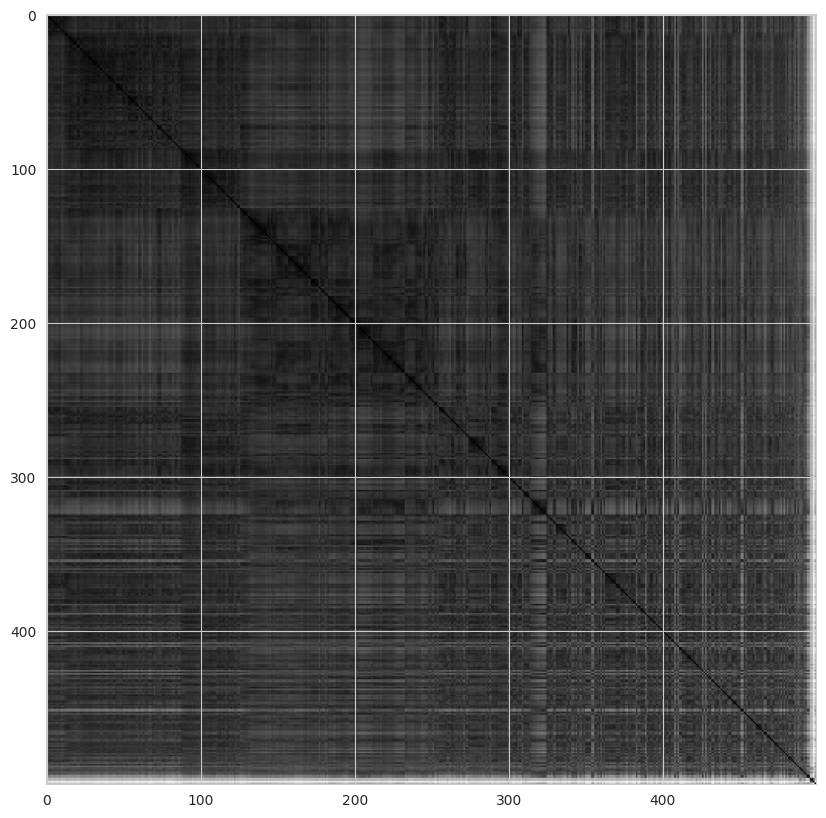

In [24]:
# Fijar la semilla para obtener resultados reproducibles
random.seed(123)

# Escalar los datos para normalizaci√≥n
X_scale = sklearn.preprocessing.scale(data_scaled)

# Calcular la estad√≠stica de Hopkins
hopkins_stat = pyclustertend.hopkins(X_scale, len(X_scale))
print(f'Estad√≠stica de Hopkins: {hopkins_stat:.4f}')

# Aplicar VAT con una muestra de datos si el tama√±o es grande
X_scale = StandardScaler().fit_transform(data_scaled)
if X_scale.shape[0] > 500:
    X_sampled = X_scale[random.sample(range(X_scale.shape[0]), 500), :]
else:
    X_sampled = X_scale
pyclustertend.vat(X_sampled)

Al obtener el valor 0.1446 el cual no es igual a 0.5 vemos factible hacer agrupamiento. Asimismo, el gr√°fico VAT nos muestra bloques oscuros en la diagnonal indicando que s√≠ hay grupos cercanos siendo los cl√∫sters.

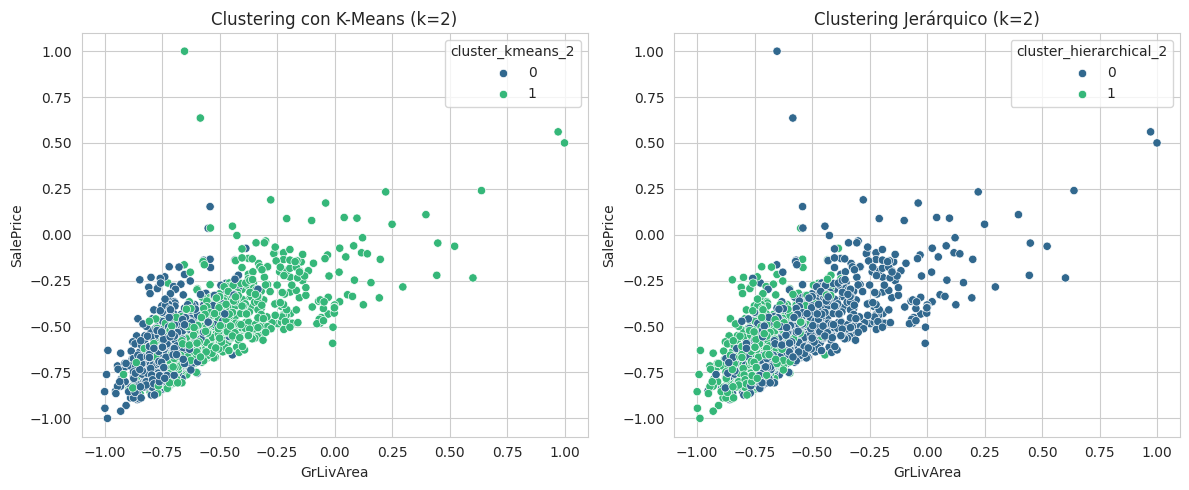

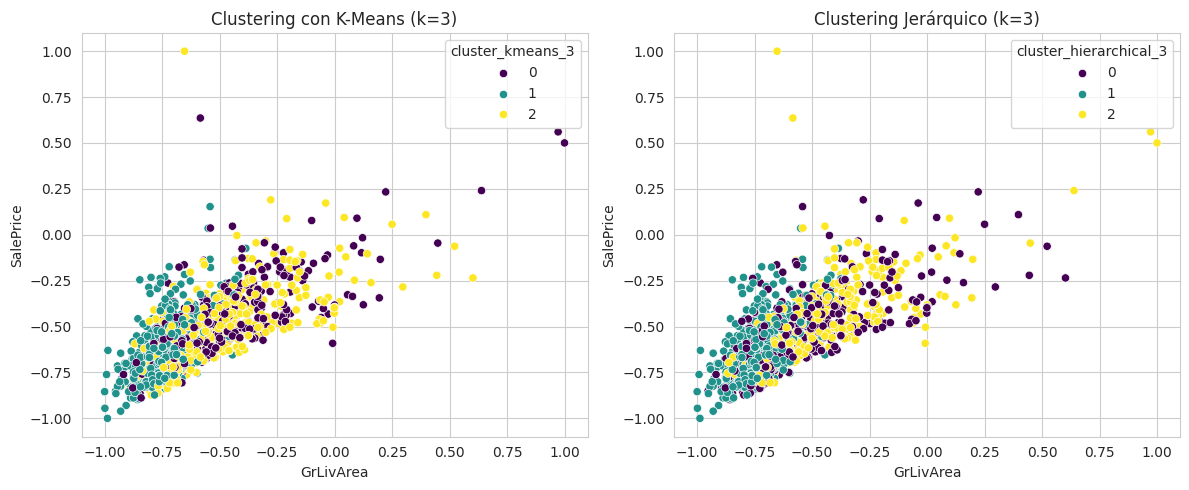

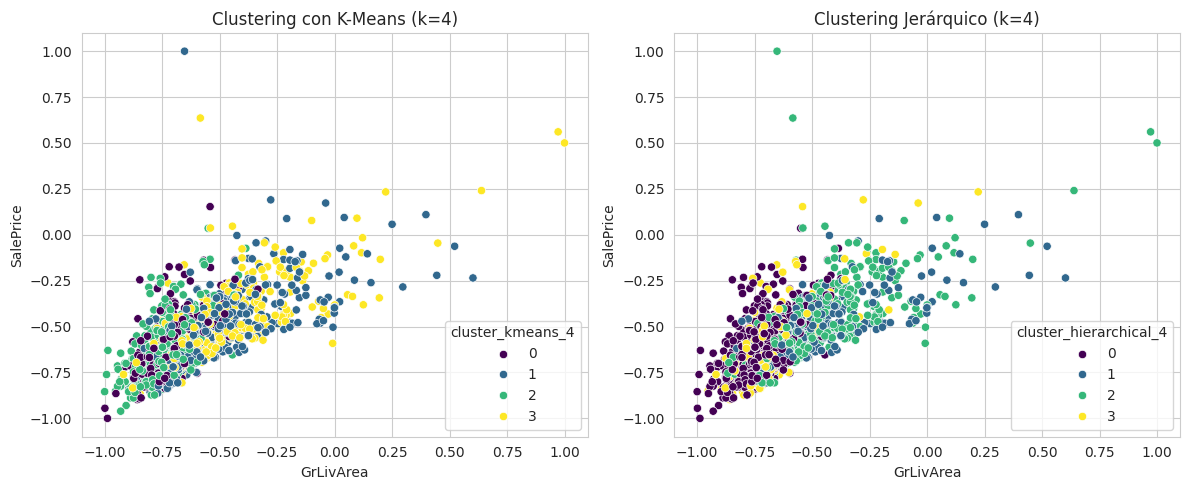

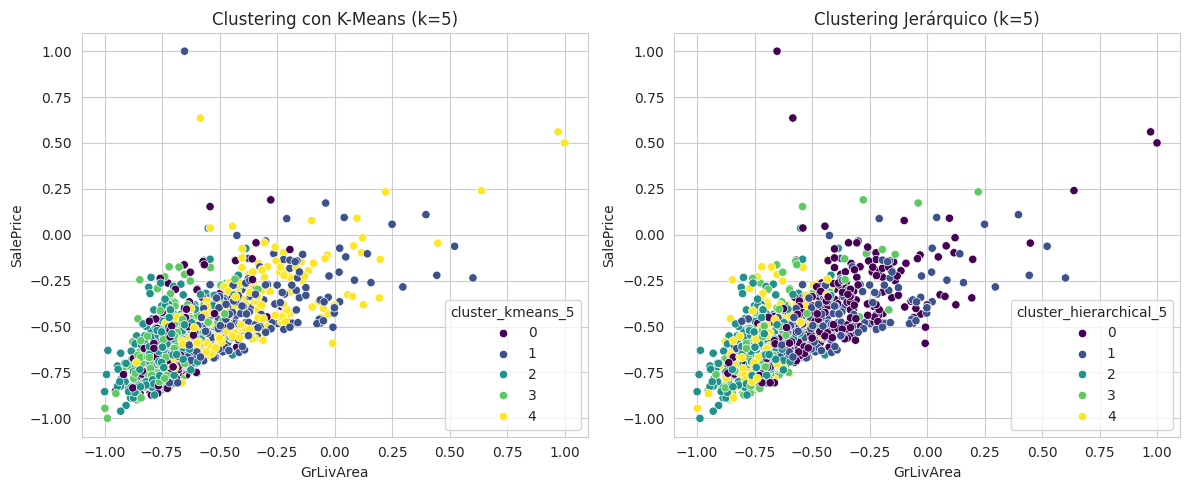

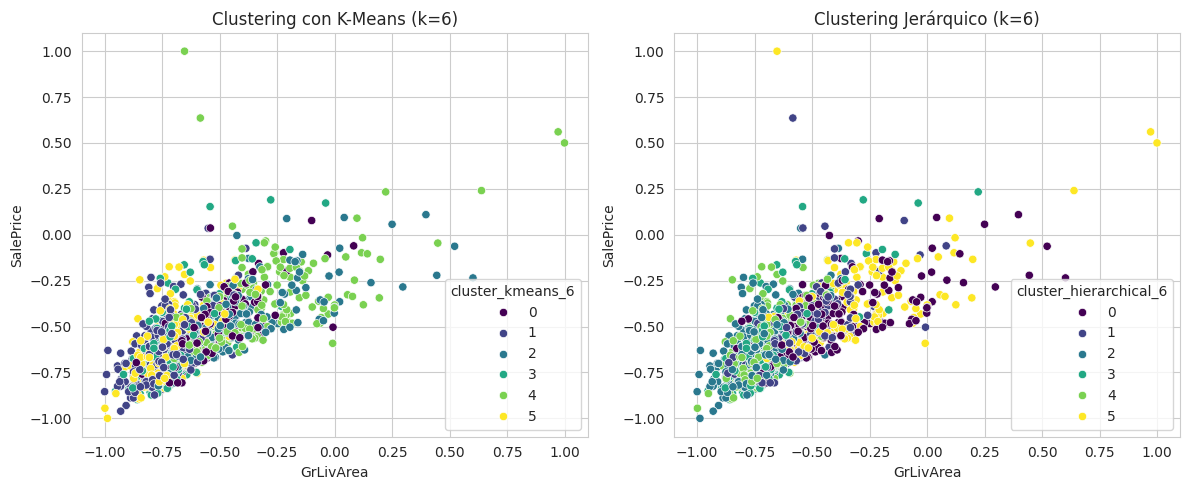

In [25]:
# Definir el rango de clusters a evaluar
k_values = range(2, 7)

# Crear figuras para comparar K-Means y Clustering Jer√°rquico para cada k
for k in k_values:
    # Aplicaci√≥n de K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df_scaled[f'cluster_kmeans_{k}'] = kmeans.fit_predict(data_scaled)

    # Aplicaci√≥n de Clustering Jer√°rquico
    hierarchical = AgglomerativeClustering(n_clusters=k)
    df_scaled[f'cluster_hierarchical_{k}'] = hierarchical.fit_predict(data_scaled)

    # Visualizaci√≥n
    plt.figure(figsize=(12, 5))

    # Visualizaci√≥n K-Means
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=df_scaled[f'cluster_kmeans_{k}'], palette="viridis")
    plt.title(f"Clustering con K-Means (k={k})")
    plt.xlabel(columns_to_use[1])
    plt.ylabel(columns_to_use[0])

    # Visualizaci√≥n Clustering Jer√°rquico
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=df_scaled[f'cluster_hierarchical_{k}'], palette="viridis")
    plt.title(f"Clustering Jer√°rquico (k={k})")
    plt.xlabel(columns_to_use[1])
    plt.ylabel(columns_to_use[0])

    plt.tight_layout()
    plt.show()


El an√°lisis de clustering muestra que la mejor segmentaci√≥n se obtiene con ùëò=2 tanto en K-Means como en el clustering jer√°rquico. La visualizaci√≥n revela dos grupos bien definidos que indica una agrupaci√≥n relativamente buena. A medida que k aumenta, la calidad del agrupamiento disminuye.

Para n_clusters = 2, el coeficiente de silueta promedio es: 0.2503
Para n_clusters = 3, el coeficiente de silueta promedio es: 0.2039
Para n_clusters = 4, el coeficiente de silueta promedio es: 0.1802
Para n_clusters = 5, el coeficiente de silueta promedio es: 0.1965
Para n_clusters = 6, el coeficiente de silueta promedio es: 0.1958


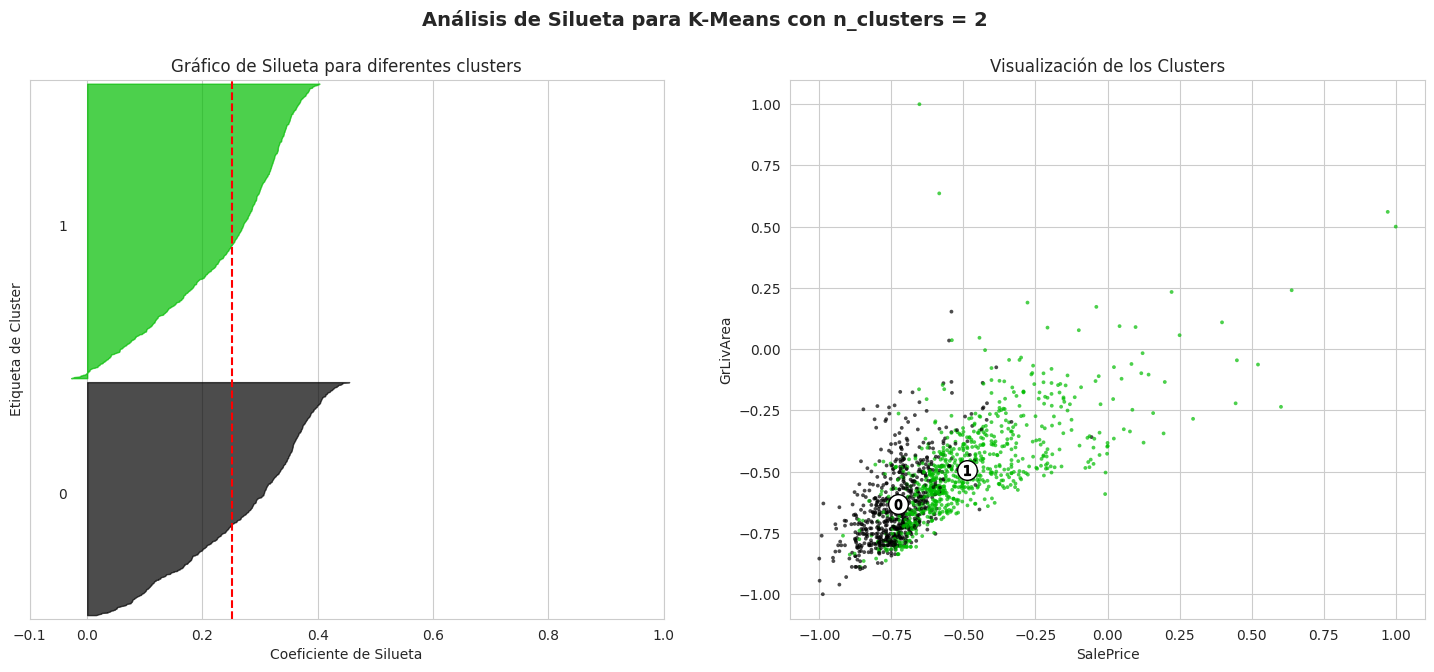

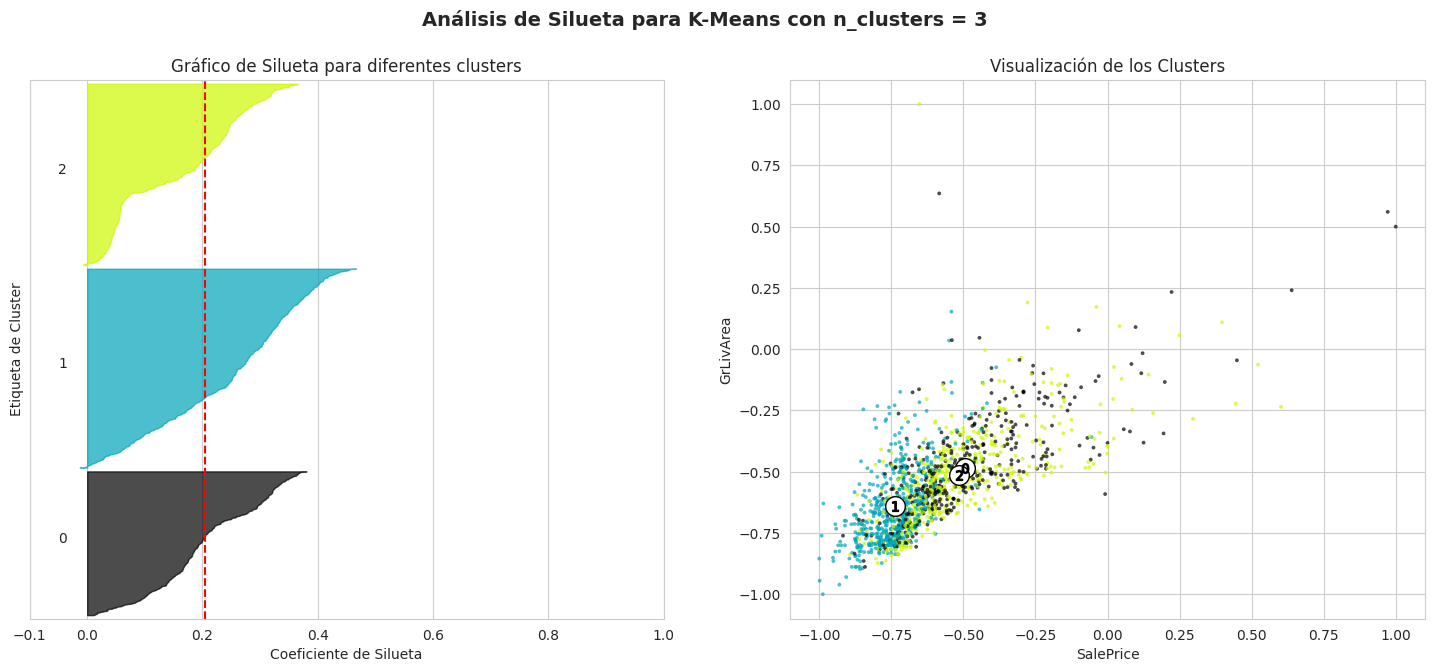

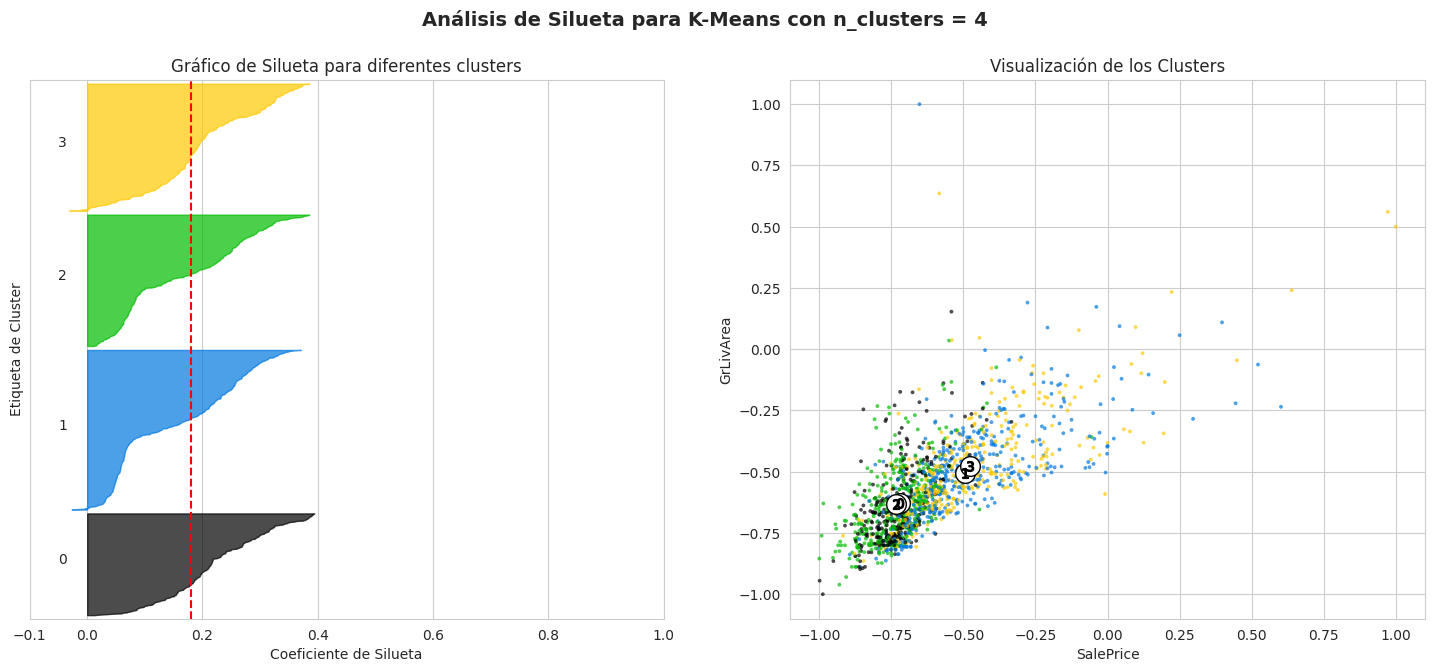

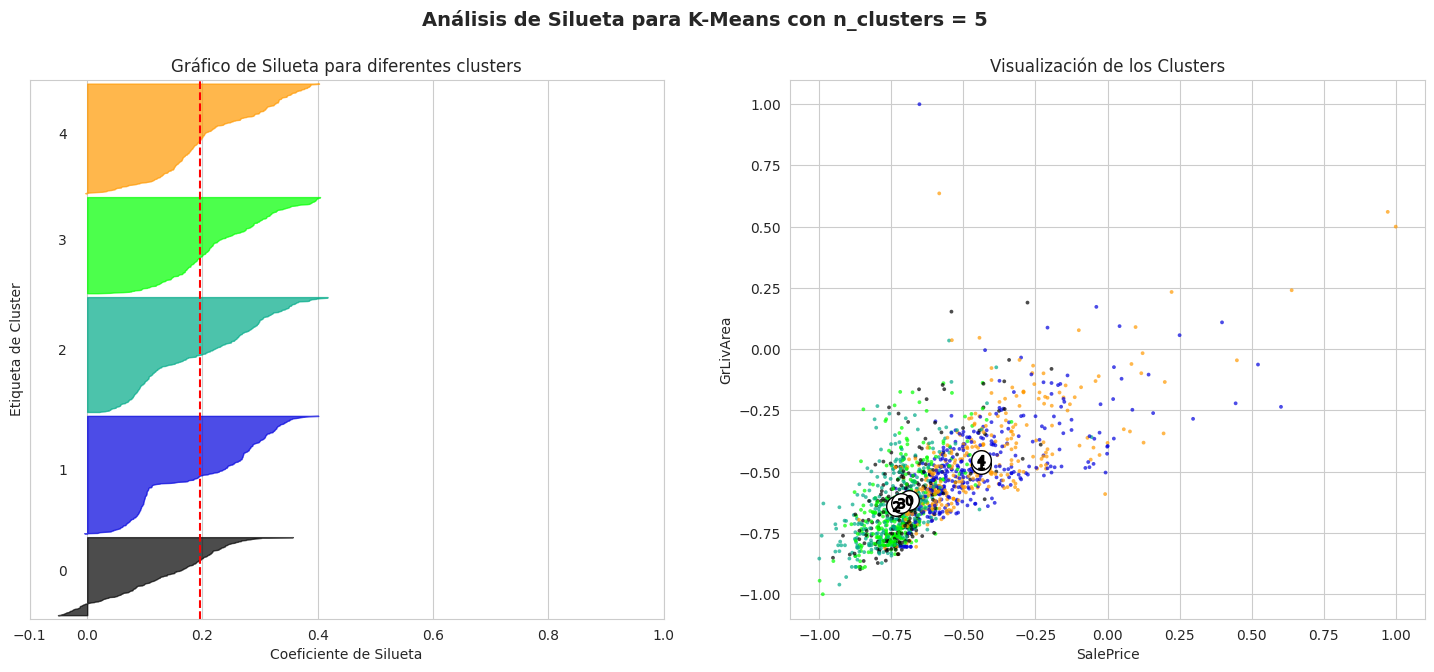

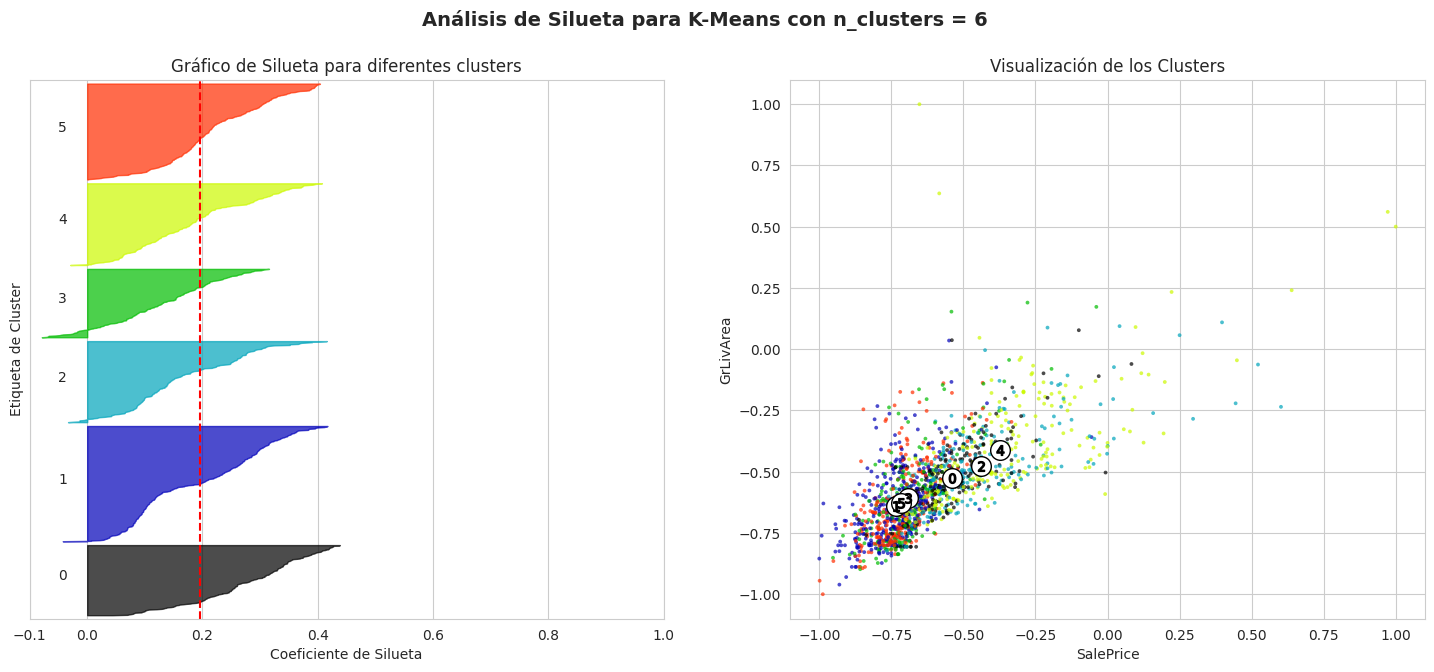

In [26]:
# Rango de clusters a evaluar
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Crear una figura con dos subgr√°ficos
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Configuraci√≥n del gr√°fico de silueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])

    # Aplicar K-Means
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = clusterer.fit_predict(data_scaled)

    # Calcular el coeficiente de silueta promedio
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print(f"Para n_clusters = {n_clusters}, el coeficiente de silueta promedio es: {silhouette_avg:.4f}")

    # Calcular los valores de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Obtener los valores de silueta del cluster actual y ordenarlos
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiquetar los clusters en el gr√°fico
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # Espaciado entre clusters

    ax1.set_title("Gr√°fico de Silueta para diferentes clusters")
    ax1.set_xlabel("Coeficiente de Silueta")
    ax1.set_ylabel("Etiqueta de Cluster")

    # L√≠nea roja para el coeficiente de silueta promedio
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Gr√°fico de dispersi√≥n de los clusters
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_scaled[:, 0], data_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Centros de los clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title("Visualizaci√≥n de los Clusters")
    ax2.set_xlabel(columns_to_use[0])
    ax2.set_ylabel(columns_to_use[1])

    plt.suptitle(f"An√°lisis de Silueta para K-Means con n_clusters = {n_clusters}",
                 fontsize=14, fontweight="bold")

plt.show()

El mejor coeficiente se muestra para n_clusters = 2, el coeficiente de silueta promedio es: 0.2503, a medida que la cantidad de clusters aumenta se ve con coeficientes de silueta cada vez menores y una segmentaci√≥n menos clara. Esto sugiere que una mayor cantidad de clusters introduce ruido y no aporta valor adicional a la estructura de los datos.

4. Divida el set de datos preprocesados en dos conjuntos: Entrenamiento y prueba. Describa
el criterio que us√≥ para crear los conjuntos: n√∫mero de filas de cada uno, estratificado o no,
balanceado o no, etc. Use el conjunto de datos llamado ‚Äútrain.csv‚Äù. Extraiga de ah√≠ su
subconjunto de prueba
* Para el subconjunto de prueba se utilizar√° test.csv

5. Haga ingenier√≠a de caracter√≠sticas, ¬øqu√© variables cree que puedan ser mejores predictores
para el precio de las casas? Explique en que bas√≥ la selecci√≥n o no de las variables.

In [27]:

# Calcular correlaci√≥n con SalePrice
correlation_matrix = df[columns_to_use].corr()
saleprice_corr = correlation_matrix["SalePrice"].sort_values(ascending=False)

# Mostrar las 10 variables m√°s correlacionadas con SalePrice
print(saleprice_corr)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
YearBuilt       0.522897
YearRemodAdd    0.507101
Fireplaces      0.466929
LotArea         0.263843
Neighborhood    0.178883
YrSold         -0.028923
OverallCond    -0.077856
Name: SalePrice, dtype: float64


Las variables con mayor correlaci√≥n positiva con SalePrice son las m√°s prometedoras para predecirlo:

OverallQual (0.79):
Es la variable m√°s correlacionada con el precio.
Refleja la calidad general de la construcci√≥n y materiales, lo que tiene un impacto directo en el valor de la vivienda.

GrLivArea (0.71):
Representa la superficie habitable sobre el suelo.
A mayor √°rea habitable, mayor suele ser el precio de la casa.

KitchenQual (0.66):
La calidad de la cocina es un factor importante para los compradores.
Una cocina de mejor calidad generalmente aumenta el valor de la vivienda.

GarageArea (0.62):
Indica el tama√±o del garaje en pies cuadrados.
Casas con garajes m√°s grandes suelen tener precios m√°s altos.

TotalBsmtSF (0.61):
Representa el √°rea total del s√≥tano.
Un s√≥tano grande puede significar espacio adicional, lo que incrementa el precio.

YearBuilt (0.52) & YearRemodAdd (0.51):
Casas m√°s nuevas o recientemente remodeladas tienden a ser m√°s caras debido a su estado y modernizaci√≥n.

Fireplaces (0.47):
Tener chimeneas es un factor que agrega valor a la propiedad.

LotArea (0.26):
Aunque no es tan alta la correlaci√≥n, un lote m√°s grande puede impactar el precio.

Neighborhood (0.18):
La ubicaci√≥n tiene un efecto moderado en el precio.
Puede ser m√°s √∫til si se agrupa en zonas de precios similares.

* Variables descartadas
YrSold (-0.028): Casi nula correlaci√≥n con el precio.
OverallCond (-0.078): Contrario a lo esperado, su impacto en el precio es leve e incluso negativo.

6. Todos los resultados deben ser reproducibles por lo que debe fijar que los conjuntos de
entrenamiento y prueba sean los mismos siempre que se ejecute el c√≥digo.

In [28]:
# Fijar la semilla para reproducibilidad
np.random.seed(42)

# Seleccionar la variable independiente (OverallQual) y la dependiente (SalePrice)
X = df_scaled[['OverallQual']]
y = df_scaled['SalePrice']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



De acuerdo con la correlaci√≥n observada, la variable OverallQual (calidad general de la casa) tiene la correlaci√≥n m√°s alta con SalePrice (0.79). Por ello, utilizaremos esta variable para la regresi√≥n lineal univariada.

7. Seleccione una de las variables y haga un modelo univariado de regresi√≥n lineal para
predecir el precio de las casas. Analice el modelo (resumen, residuos, resultados de la
predicci√≥n). Mu√©strelo gr√°ficamente.

# Modelo Univariado

In [29]:
# Crear el modelo de regresi√≥n lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Obtener los coeficientes del modelo
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercepci√≥n: {intercept}")
print(f"Pendiente: {slope}")


Intercepci√≥n: -0.6696122641574076
Pendiente: 0.5546714331882328


In [30]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular m√©tricas de evaluaci√≥n
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadr√°tico Medio (MSE): {mse}")
print(f"Coeficiente de Determinaci√≥n (R¬≤): {r2}")


Error Cuadr√°tico Medio (MSE): 0.020681185101408005
Coeficiente de Determinaci√≥n (R¬≤): 0.6504677778896862


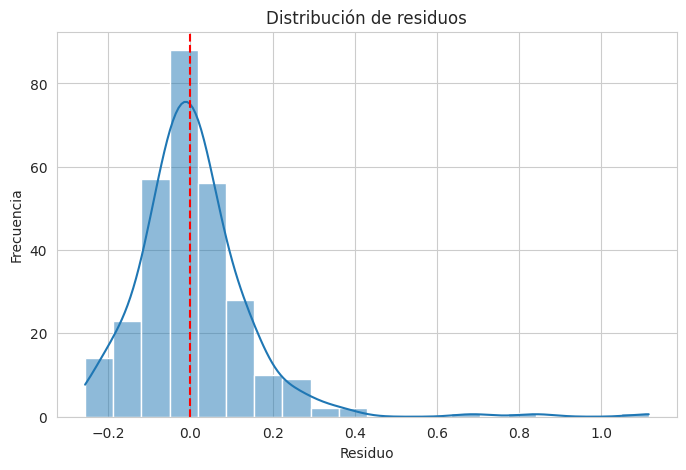

In [31]:
# Graficar los residuos
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=20, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de residuos")
plt.show()


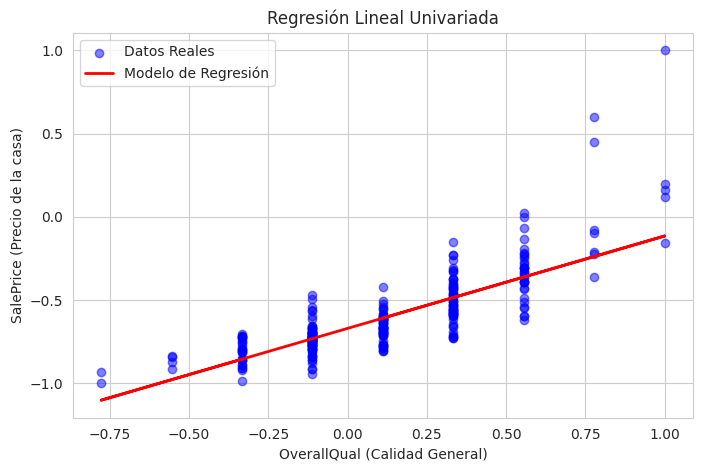

In [32]:
plt.figure(figsize=(8,5))

# Graficar puntos reales
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Datos Reales")

# Graficar la recta de regresi√≥n
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Modelo de Regresi√≥n")

plt.xlabel("OverallQual (Calidad General)")
plt.ylabel("SalePrice (Precio de la casa)")
plt.title("Regresi√≥n Lineal Univariada")
plt.legend()
plt.show()


Intercepci√≥n (-0.67):
El valor de la intercepci√≥n es negativo, lo que significa que, si la variable OverallQual fuera igual a 0 (lo cual no es un valor pr√°ctico en este contexto), el modelo predice un precio negativo, lo cual no tiene sentido en t√©rminos del precio real de la casa. Sin embargo, esto es com√∫n en modelos de regresi√≥n lineales y no afecta demasiado a la validez del modelo si el rango de los datos es positivo.

Pendiente (0.55):
La pendiente positiva indica que a medida que OverallQual (calidad general de la casa) aumenta, el precio de la casa tambi√©n tiende a aumentar. Por cada incremento de 1 unidad en la calidad de la casa, el precio se incrementa en 0.55 unidades (en t√©rminos normalizados debido a la escala que aplicamos previamente).

Error Cuadr√°tico Medio (MSE = 0.0207):
Un MSE relativamente bajo indica que las predicciones del modelo est√°n bastante cerca de los valores reales. Un valor bajo de MSE sugiere que el modelo tiene un buen desempe√±o, pero la evaluaci√≥n completa debe considerar tambi√©n el valor de R¬≤ para entender cu√°nto del comportamiento del precio se puede explicar solo con la calidad de la casa.

Coeficiente de Determinaci√≥n (R¬≤ = 0.65):
Un R¬≤ de 0.65 es bastante razonable, lo que significa que el 65% de la variabilidad en el precio de las casas se puede explicar por la calidad general de la casa. Este es un buen valor para un modelo univariado (con solo una variable predictora), lo que indica que OverallQual es un predictor relativamente fuerte del precio. Sin embargo, el modelo podr√≠a mejorarse a√∫n m√°s al considerar otras variables.

Error Cuadr√°tico Medio (MSE): 0.011530605313786616
Coeficiente de Determinaci√≥n (R¬≤): 0.8051215112749783


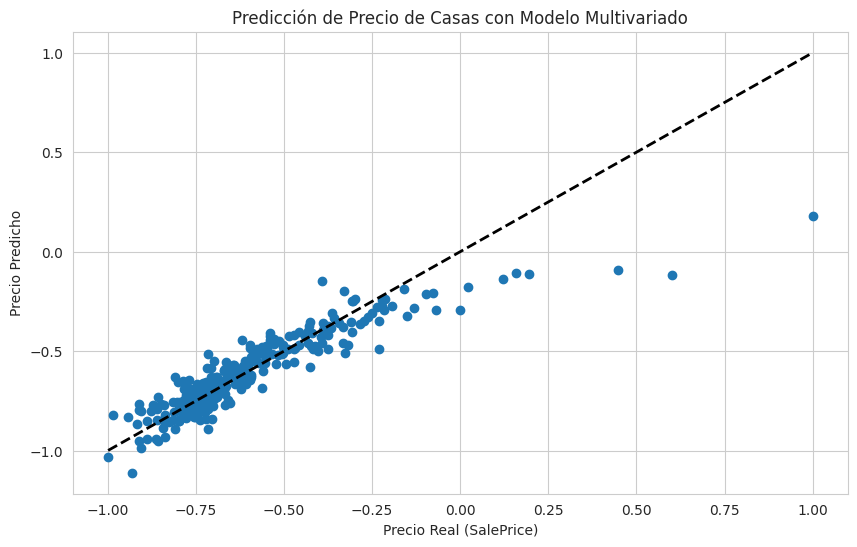

In [33]:
# Selecci√≥n de las variables relevantes
variables = ['OverallQual', 'GrLivArea', 'KitchenQual', 'GarageArea', 'TotalBsmtSF']

# Dividir los datos en variables independientes (X) y dependiente (y)
X = df_scaled[variables]
y = df_scaled['SalePrice']

# Dividir los datos en entrenamiento y prueba (fijar aleatoriedad para resultados reproducibles)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresi√≥n lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Error Cuadr√°tico Medio (MSE): {mse}")
print(f"Coeficiente de Determinaci√≥n (R¬≤): {r2}")

# Graficar los resultados
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Precio Real (SalePrice)")
plt.ylabel("Precio Predicho")
plt.title("Predicci√≥n de Precio de Casas con Modelo Multivariado")
plt.show()


Error Cuadr√°tico Medio (MSE):
Un MSE de 0.0115 indica que el modelo tiene un error relativamente bajo, lo que sugiere que las predicciones est√°n bastante cerca de los valores reales.

Coeficiente de Determinaci√≥n (R¬≤):
Un valor de 0.8051 sugiere que el modelo explica aproximadamente el 80.5% de la varianza en los precios de las casas, lo que indica un buen ajuste.

8. Haga un modelo de regresi√≥n lineal con todas las variables num√©ricas para predecir el precio
de las casas. Analice el modelo (resumen, residuos, resultados de la predicci√≥n). Muestre el
modelo gr√°ficamente

# Modelo Multivariado

Error Cuadr√°tico Medio (MSE): 0.010644576146496151
Coeficiente de Determinaci√≥n (R¬≤): 0.8200962693547995


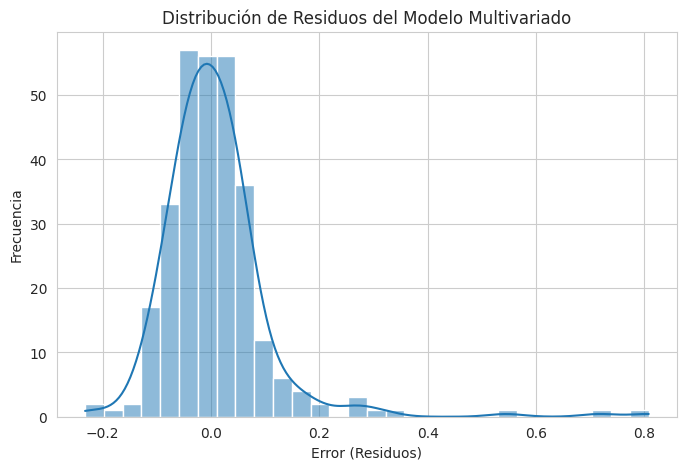

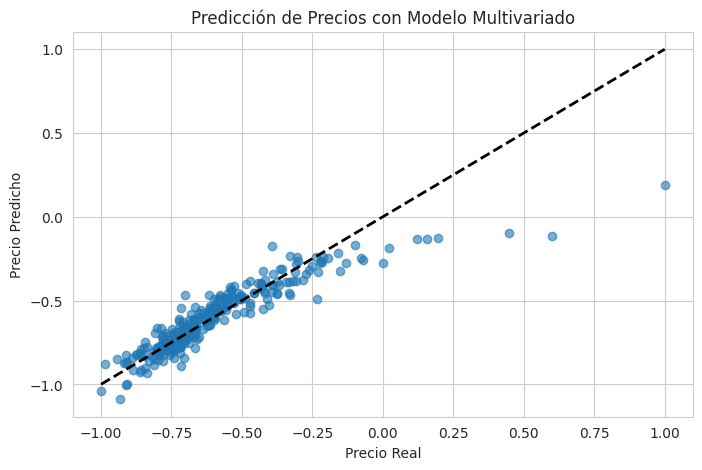

In [34]:
# Seleccionar todas las variables num√©ricas
numerical_vars = df_scaled.select_dtypes(include=[np.number]).columns.tolist()
numerical_vars.remove('SalePrice')  # Excluir la variable objetivo

# Definir X (variables independientes) e y (variable dependiente)
X = df_scaled[numerical_vars]
y = df_scaled['SalePrice']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluaci√≥n del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Resultados del modelo
print(f"Error Cuadr√°tico Medio (MSE): {mse}")
print(f"Coeficiente de Determinaci√≥n (R¬≤): {r2}")

# An√°lisis de residuos
residuals = y_test - y_pred

# Gr√°fica de residuos
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Error (Residuos)")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de Residuos del Modelo Multivariado")
plt.show()

# Gr√°fica de predicci√≥n vs realidad
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Predicci√≥n de Precios con Modelo Multivariado")
plt.show()


Los resultados obtenidos indican que el modelo de regresi√≥n lineal con todas las variables num√©ricas tiene un buen desempe√±o para predecir el precio de las casas.

üîπ MSE = 0.0106 ‚Üí Un error cuadr√°tico medio bajo indica que las predicciones est√°n cerca de los valores reales.

üîπ R¬≤ = 0.8201 ‚Üí El modelo explica el 82.01% de la variabilidad en los precios de las casas, lo cual es una mejora significativa respecto al modelo univariado (donde R¬≤ era 0.65).